In [41]:
import pandas as pd, matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


In [5]:
 #Cargar los datos desde el archivo CSV
data = pd.read_csv('randomforest.csv')
data.head()

,Edad,Ingresos,Educación,Deuda,Estado Civil,Compra
0,39,5634,Carrera,3832,Casado,No
1,47,6573,Maestría,2316,Soltero,Sí
2,35,9647,Especialidad,1349,Viudo,Sí
3,24,6721,Carrera,2235,Casado,Sí
4,42,9397,Maestría,2491,Soltero,No


In [7]:
# Codificar la característica categórica "estado_civil" utilizando codificación one-hot
data = pd.get_dummies(data, columns=['Estado Civil'])

In [9]:
data.head()

,Edad,Ingresos,Educación,Deuda,Compra,Estado Civil_Casado,Estado Civil_Soltero,Estado Civil_Viudo
0,39,5634,Carrera,3832,No,1,0,0
1,47,6573,Maestría,2316,Sí,0,1,0
2,35,9647,Especialidad,1349,Sí,0,0,1
3,24,6721,Carrera,2235,Sí,1,0,0
4,42,9397,Maestría,2491,No,0,1,0


In [10]:
# Codificar la característica categórica "estado_civil" utilizando codificación one-hot
data = pd.get_dummies(data, columns=['Educación'])

In [11]:
data.head()

,Edad,Ingresos,Deuda,Compra,Estado Civil_Casado,Estado Civil_Soltero,Estado Civil_Viudo,Educación_Carrera,Educación_Especialidad,Educación_Maestría
0,39,5634,3832,No,1,0,0,1,0,0
1,47,6573,2316,Sí,0,1,0,0,0,1
2,35,9647,1349,Sí,0,0,1,0,1,0
3,24,6721,2235,Sí,1,0,0,1,0,0
4,42,9397,2491,No,0,1,0,0,0,1


In [16]:
# Separar las características (X) y el objetivo (y)
X = data.drop('Compra', axis=1)
y = data['Compra']

In [20]:
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [21]:
# Entrenar el modelo
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [22]:
# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Crear una lista de nombres de características
feature_names = X.columns

In [23]:
# Crear un diccionario que mapea nombres de características con sus importancias
feature_importances = dict(zip(feature_names, importances))


In [24]:
# Ordenar las características por su importancia
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)


In [25]:
# Mostrar las características ordenadas por importancia
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

Deuda: 0.3492072772750684
Ingresos: 0.3406087615536357
Edad: 0.2656539816150932
Educación_Especialidad: 0.008298142012408888
Estado Civil_Viudo: 0.008261416328112198
Estado Civil_Casado: 0.0074805455020928715
Educación_Carrera: 0.006947739803714884
Estado Civil_Soltero: 0.0068095243283342426
Educación_Maestría: 0.006732611581539671


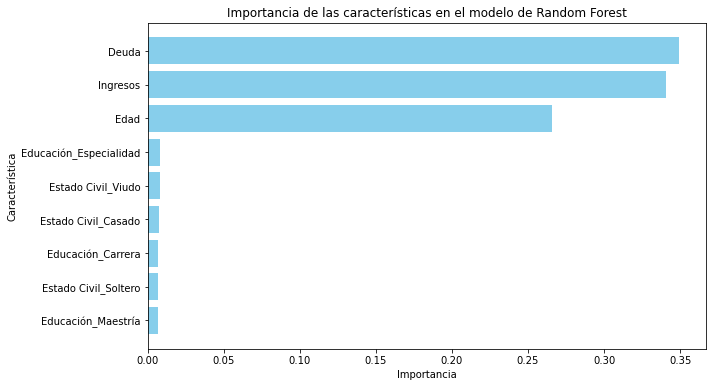

In [36]:
 #Lista de características y sus importancias
features = ['Deuda', 'Ingresos', 'Edad', 'Educación_Especialidad', 'Estado Civil_Viudo', 
            'Estado Civil_Casado', 'Educación_Carrera', 'Estado Civil_Soltero', 'Educación_Maestría']
importances = [0.3492072772750684, 0.3406087615536357, 0.2656539816150932, 0.008298142012408888, 
               0.008261416328112198, 0.0074805455020928715, 0.006947739803714884, 0.0068095243283342426, 
               0.006732611581539671]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el modelo de Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén arriba
plt.show()

In [40]:
#predicciones

nuevo_dato = pd.DataFrame({
    'edad': [15],            # Edad del cliente
    'ingresos': [5000],     # Ingresos del cliente
    'educación_Bachillerato': [0],   # Codificación one-hot para educación: 0 si no tiene Bachillerato
    'educación_Licenciatura': [1],   # Codificación one-hot para educación: 1 si tiene Licenciatura
    'educación_Maestría': [0],       # Codificación one-hot para educación: 0 si no tiene Maestría
    'estado_civil_Casado': [1],      # Codificación one-hot para estado civil: 1 si está Casado
    'estado_civil_Divorciado': [0],  # Codificación one-hot para estado civil: 0 si no está Divorciado
    'estado_civil_Soltero': [0],     # Codificación one-hot para estado civil: 0 si no está Soltero
    'estado_civil_Viudo': [0]        # Codificación one-hot para estado civil: 0 si no está Viudo
})

# Hacer predicciones utilizando el modelo entrenado
predicciones = rf_model.predict(nuevo_dato)

# Las predicciones serán una serie de valores que representan las predicciones del modelo para cada ejemplo en 'nuevos_datos'
# Puedes imprimir las predicciones para verlas
print(predicciones)

['No ']


C:\Users\kevin\Dropbox\Python 3.9\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- edad
- educación_Bachillerato
- educación_Licenciatura
- educación_Maestría
- estado_civil_Casado
- ...
Feature names seen at fit time, yet now missing:
- Deuda
- Edad
- Educación_Carrera
- Educación_Especialidad
- Educación_Maestría
- ...

  warnings.warn(message, FutureWarning)


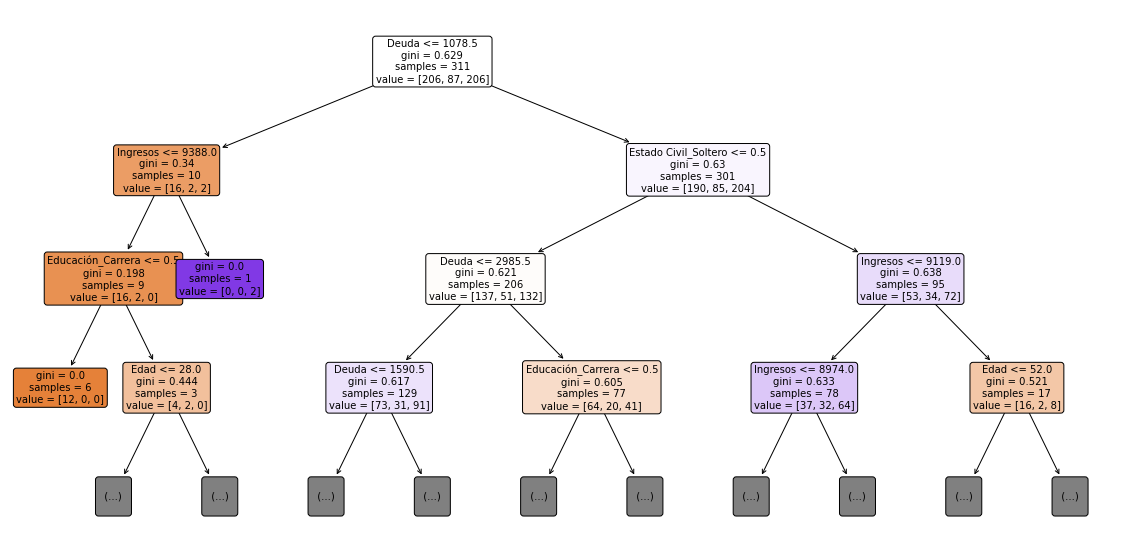

In [45]:
# Seleccionar un árbol específico del bosque (por ejemplo, el primero)
arbol = rf_model.estimators_[0]

# Visualizar el árbol
plt.figure(figsize=(20, 10))
plot_tree(arbol, max_depth=3,feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()